# Stocks Predictions

! <img src="https://blog.tipranks.com/wp-content/uploads/2022/11/shutterstock_1685010460-750x406.jpg">

## Dataset Used: https://www.kaggle.com/datasets/dgawlik/nyse

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


# 1. Importing needed libraries

In [3]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import tensorflow as tf
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 2. Analyzing data

In [4]:
full = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv", index_col = 0)

In [5]:
full.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
full.shape

(851264, 6)

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [8]:
full.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [9]:
print('\nnumber of different stocks: ', len(list(set(full.symbol))))
print(list(set(full.symbol)))


number of different stocks:  501
['VRTX', 'AWK', 'HCA', 'VZ', 'JEC', 'KEY', 'IBM', 'UDR', 'GOOG', 'JCI', 'TSN', 'IVZ', 'KLAC', 'ADM', 'SCHW', 'FLIR', 'NOV', 'FSLR', 'EMN', 'HOLX', 'STX', 'SE', 'ALB', 'MCK', 'M', 'MET', 'CL', 'HST', 'STZ', 'WY', 'AMT', 'GE', 'CB', 'GPC', 'ROST', 'ETFC', 'FISV', 'F', 'ILMN', 'MDLZ', 'WDC', 'HUM', 'VTR', 'AFL', 'MAS', 'KMI', 'FCX', 'IDXX', 'NLSN', 'HRB', 'AIV', 'DISCA', 'BSX', 'EL', 'AMGN', 'GOOGL', 'PX', 'FIS', 'PRGO', 'SNA', 'MTD', 'GIS', 'CHRW', 'AN', 'SJM', 'CCI', 'TSO', 'STI', 'AMP', 'COG', 'XRAY', 'INTC', 'BEN', 'PLD', 'ALL', 'TGT', 'XL', 'ROK', 'JNJ', 'MO', 'URBN', 'FFIV', 'RHT', 'MRO', 'GRMN', 'TEL', 'TGNA', 'DD', 'REGN', 'FOXA', 'C', 'CMCSA', 'MPC', 'EXC', 'FOX', 'AKAM', 'GT', 'ALXN', 'ADBE', 'V', 'LOW', 'HON', 'BDX', 'AES', 'D', 'NEM', 'DGX', 'FTI', 'OXY', 'FTR', 'CTSH', 'EA', 'KIM', 'SWN', 'FDX', 'IRM', 'PNC', 'SPG', 'KHC', 'MJN', 'BBT', 'GGP', 'PSA', 'CSRA', 'ABT', 'PCLN', 'TXT', 'PPL', 'VRSK', 'SHW', 'CNP', 'VFC', 'DVN', 'ADP', 'GS', 'SPGI',

### We have 501 different stocks but we will work on Microsoft Stocks on this notebook

# 3. Choosing a Stock Symbol to work on

In [10]:
df = full.loc[full['symbol']=='MSFT']

In [11]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-23,MSFT,63.450001,63.240002,62.799999,63.540001,12403800.0
2016-12-27,MSFT,63.209999,63.279999,63.209999,64.070000,11763200.0
2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0
2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0
2016-12-30,MSFT,62.959999,62.139999,62.029999,62.990002,25579900.0


In [12]:
#Since we made sure that our df includes only Microsoft stocks
#we can drop the symbol column
df.drop('symbol', 1, inplace=True)

# 4. EDA

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

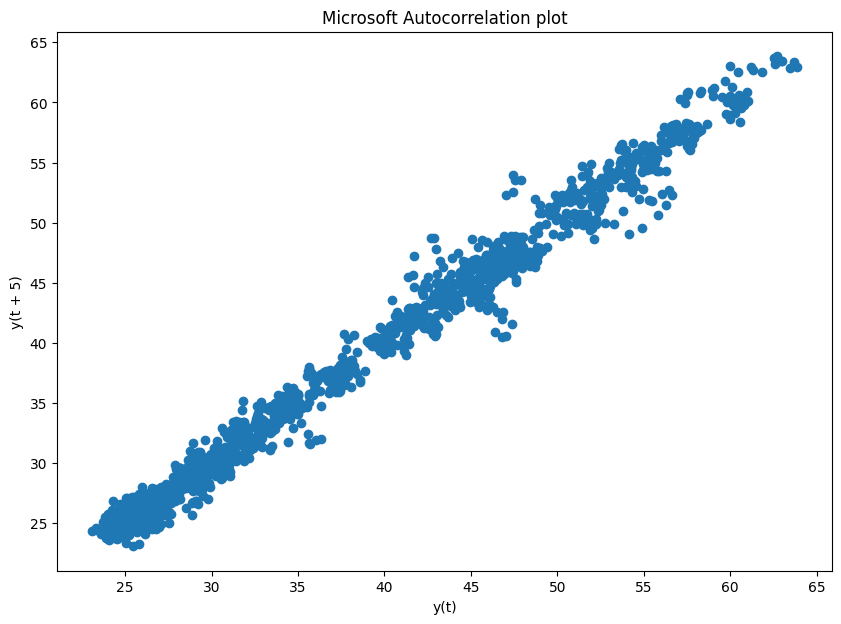

In [13]:
#A lag plot checks whether a data set or time series is random or not
plt.figure(figsize=(10,7))
lag_plot(df['open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

<AxesSubplot: xlabel='date'>

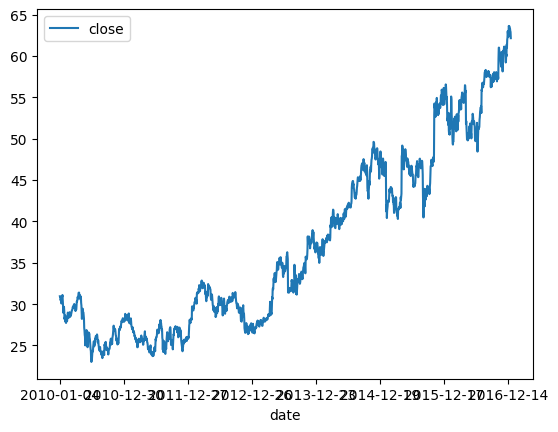

In [14]:
df[['close']].plot()

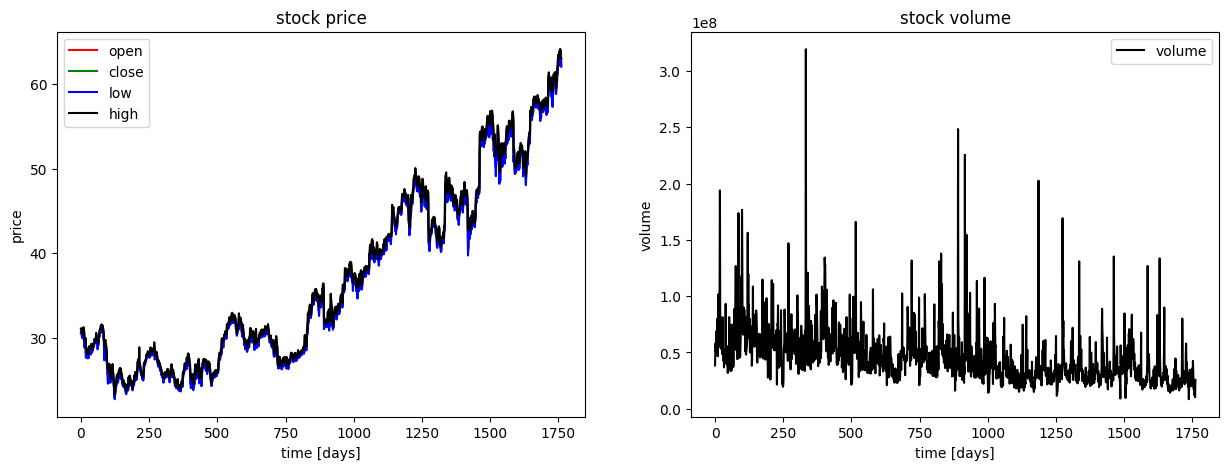

In [15]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.open.values, color='red', label='open')
plt.plot(df.close.values, color='green', label='close')
plt.plot(df.low.values, color='blue', label='low')
plt.plot(df.high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df.volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 5. Normalize & manipulate data

In [16]:
# function for min-max normalization of stock
def normalize(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

df_norm = normalize(df)

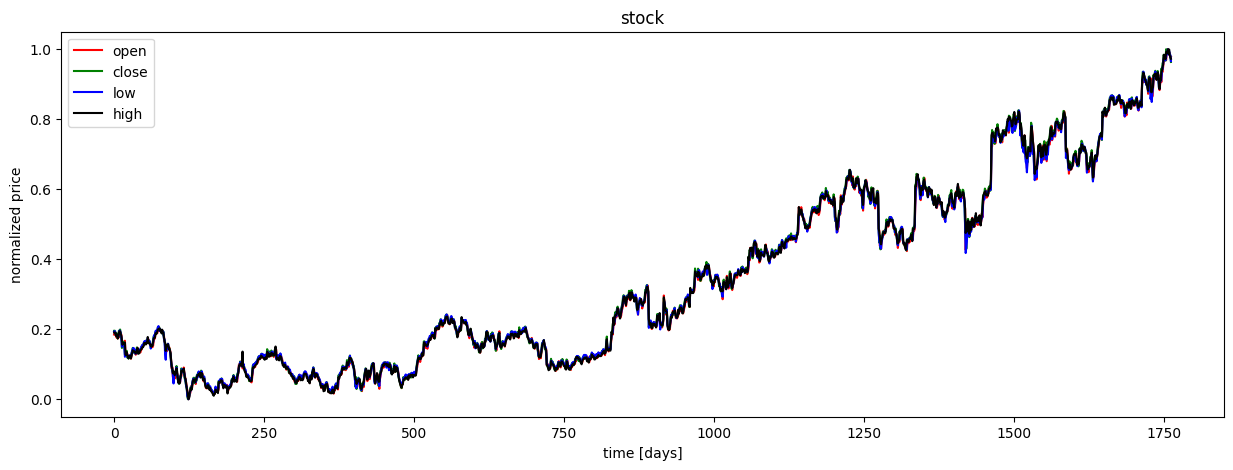

In [17]:
plt.figure(figsize=(15, 5));
plt.plot(df.open.values, color='red', label='open')
plt.plot(df_norm.close.values, color='green', label='close')
plt.plot(df_norm.low.values, color='blue', label='low')
plt.plot(df_norm.high.values, color='black', label='high')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()

# 6. Models & Prediction

In [18]:
train = df_norm.drop('close', axis=1)
test = df_norm['close']

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, shuffle = False, random_state = 42)

In [19]:
from sklearn.linear_model import LinearRegression

# model training

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
date,,
2015-08-10,0.598867,0.597911
2015-08-11,0.576213,0.571347
2015-08-12,0.584339,0.575079
2015-08-13,0.584093,0.582609
2015-08-14,0.590741,0.590049


In [21]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9966946766619044


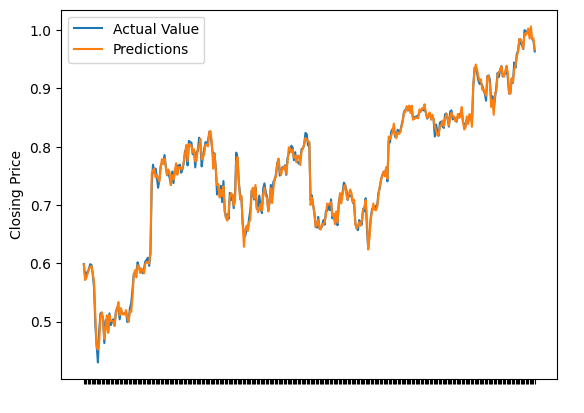

In [22]:
plt.plot(pred_df)
plt.ylabel('Closing Price')
plt.xticks(color='w')
plt.legend(['Actual Value', 'Predictions'])
plt.show()